In [1]:
# Import libraries
import pandas as pd
import numpy as np
import gzip as gz
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from zipfile import ZipFile
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Load and explore dataset
nba = 'NBAInjuries.zip'
with ZipFile(nba, 'r') as zip:
    zip.extractall('nba_unzipped')
    
df = pd.read_csv('nba_unzipped/injuries_2010-2020.csv')
df.head()

,Date,Team,Acquired,Relinquished,Notes
0,2010-10-03,Bulls,NaN,Carlos Boozer,fractured bone in right pinky finger (out inde...
1,2010-10-06,Pistons,NaN,Jonas Jerebko,torn right Achilles tendon (out indefinitely)
2,2010-10-06,Pistons,NaN,Terrico White,broken fifth metatarsal in right foot (out ind...
3,2010-10-08,Blazers,NaN,Jeff Ayres,torn ACL in right knee (out indefinitely)
4,2010-10-08,Nets,NaN,Troy Murphy,strained lower back (out indefinitely)


In [3]:
# Drop Acquired column, null values, and rename Relinquished to Name
df.drop(['Acquired'], axis=1, inplace=True)
df.dropna(inplace=True)
df.rename(columns={'Relinquished':'Name'}, inplace=True)

In [4]:
pd.set_option('display.max_colwidth', None)
df

,Date,Team,Name,Notes
0,2010-10-03,Bulls,Carlos Boozer,fractured bone in right pinky finger (out indefinitely)
1,2010-10-06,Pistons,Jonas Jerebko,torn right Achilles tendon (out indefinitely)
2,2010-10-06,Pistons,Terrico White,broken fifth metatarsal in right foot (out indefinitely)
3,2010-10-08,Blazers,Jeff Ayres,torn ACL in right knee (out indefinitely)
4,2010-10-08,Nets,Troy Murphy,strained lower back (out indefinitely)
...,...,...,...,...
27097,2020-09-22,Celtics,Romeo Langford,surgery on right wrist (out for season)
27098,2020-09-23,Heat,Gabe Vincent,sore right knee (DTD)
27099,2020-09-30,Heat,Bam Adebayo,strained left shoulder (DTD)
27101,2020-10-02,Heat,Bam Adebayo,strained neck (DTD)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17558 entries, 0 to 27102
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    17558 non-null  object
 1   Team    17558 non-null  object
 2   Name    17558 non-null  object
 3   Notes   17558 non-null  object
dtypes: object(4)
memory usage: 685.9+ KB


In [6]:
s1 = df.Notes

In [7]:
s1

0         fractured bone in right pinky finger (out indefinitely)
1                   torn right Achilles tendon (out indefinitely)
2        broken fifth metatarsal in right foot (out indefinitely)
3                       torn ACL in right knee (out indefinitely)
4                          strained lower back (out indefinitely)
                                   ...                           
27097                     surgery on right wrist (out for season)
27098                                       sore right knee (DTD)
27099                                strained left shoulder (DTD)
27101                                         strained neck (DTD)
27102          placed on IL with torn plantar fascia in left foot
Name: Notes, Length: 17558, dtype: object

In [8]:
ACL = s1.str.contains('acl', case=False)
ACL.value_counts()

False    17414
True       144
Name: Notes, dtype: int64

In [9]:
Achilles = s1.str.contains('achilles', case=False)
Achilles.value_counts()

False    17295
True       263
Name: Notes, dtype: int64

In [10]:
patella_tendon = s1.str.contains('patella tendon', case=False)
patella_tendon.value_counts()

False    17533
True        25
Name: Notes, dtype: int64

In [11]:
out_for_season = s1.str.contains('out for season', case=False)
out_for_season.value_counts()

False    16433
True      1125
Name: Notes, dtype: int64

In [12]:
df = df.assign(ACL=pd.Series(ACL).values)
df = df.assign(Achilles=pd.Series(Achilles).values)
df = df.assign(out_for_season=pd.Series(out_for_season).values)
df = df*1
df

,Date,Team,Name,Notes,ACL,Achilles,out_for_season
0,2010-10-03,Bulls,Carlos Boozer,fractured bone in right pinky finger (out indefinitely),0,0,0
1,2010-10-06,Pistons,Jonas Jerebko,torn right Achilles tendon (out indefinitely),0,1,0
2,2010-10-06,Pistons,Terrico White,broken fifth metatarsal in right foot (out indefinitely),0,0,0
3,2010-10-08,Blazers,Jeff Ayres,torn ACL in right knee (out indefinitely),1,0,0
4,2010-10-08,Nets,Troy Murphy,strained lower back (out indefinitely),0,0,0
...,...,...,...,...,...,...,...
27097,2020-09-22,Celtics,Romeo Langford,surgery on right wrist (out for season),0,0,1
27098,2020-09-23,Heat,Gabe Vincent,sore right knee (DTD),0,0,0
27099,2020-09-30,Heat,Bam Adebayo,strained left shoulder (DTD),0,0,0
27101,2020-10-02,Heat,Bam Adebayo,strained neck (DTD),0,0,0


In [13]:
# Dataset of injuries that resulted in player being 'out for season'
ofs = df[(df['Notes'].str.contains('out for season', case=False))]
ofs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1125 entries, 8 to 27097
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            1125 non-null   object
 1   Team            1125 non-null   object
 2   Name            1125 non-null   object
 3   Notes           1125 non-null   object
 4   ACL             1125 non-null   int64 
 5   Achilles        1125 non-null   int64 
 6   out_for_season  1125 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 70.3+ KB


In [14]:
ofs

,Date,Team,Name,Notes,ACL,Achilles,out_for_season
8,2010-10-12,Bucks,Darington Hobson,surgery on left hip (out for season),0,0,1
17,2010-10-26,Blazers,Greg Oden,placed on IL with left knee injury (out for season),0,0,1
75,2010-10-27,Pistons,Jonas Jerebko,placed on IL recovering from surgery to repair torn right Achilles tendon (out for season),0,1,1
76,2010-10-27,Pistons,Terrico White,placed on IL recovering from surgery on right foot to repair broken fifth metatarsal (out for season),0,0,1
175,2010-11-04,Blazers,Elliot Williams,"dislocated patella in right knee (surgery, out for season)",0,0,1
...,...,...,...,...,...,...,...
27077,2020-08-29,Blazers,Wenyen Gabriel,right quadricep injury (out for season),0,0,1
27080,2020-08-30,Mavericks,Courtney Lee,placed on IL with left calf injury (out for season),0,0,1
27095,2020-09-12,Rockets,Tyson Chandler,placed on IL with neck spasms (out for season),0,0,1
27096,2020-09-18,Celtics,Romeo Langford,placed on IL with strained right adductor (out for season),0,0,1


In [15]:
ofs_10 = ofs[(ofs['Date'] < '2011-07-01')]
ofs_11 = ofs[(ofs['Date'].between('2011-07-01','2012-07-01'))]
ofs_12 = ofs[(ofs['Date'].between('2012-07-01','2013-07-01'))]
ofs_13 = ofs[(ofs['Date'].between('2013-07-01','2014-07-01'))]
ofs_14 = ofs[(ofs['Date'].between('2014-07-01','2015-07-01'))]
ofs_15 = ofs[(ofs['Date'].between('2015-07-01','2016-07-01'))]
ofs_16 = ofs[(ofs['Date'].between('2016-07-01','2017-07-01'))]
ofs_17 = ofs[(ofs['Date'].between('2017-07-01','2018-07-01'))]
ofs_18 = ofs[(ofs['Date'].between('2018-07-01','2019-07-01'))]

In [16]:
ofs_10

,Date,Team,Name,Notes,ACL,Achilles,out_for_season
8,2010-10-12,Bucks,Darington Hobson,surgery on left hip (out for season),0,0,1
17,2010-10-26,Blazers,Greg Oden,placed on IL with left knee injury (out for season),0,0,1
75,2010-10-27,Pistons,Jonas Jerebko,placed on IL recovering from surgery to repair torn right Achilles tendon (out for season),0,1,1
76,2010-10-27,Pistons,Terrico White,placed on IL recovering from surgery on right foot to repair broken fifth metatarsal (out for season),0,0,1
175,2010-11-04,Blazers,Elliot Williams,"dislocated patella in right knee (surgery, out for season)",0,0,1
...,...,...,...,...,...,...,...
2599,2011-05-11,Celtics,Shaquille O'Neal,placed on IL (out for season),0,0,1
2605,2011-05-25,Bulls,Omer Asik,stress fracture in left fibula (out for season),0,0,1
2607,2011-05-26,Bulls,Omer Asik,placed on IL with stress fracture in left fibula (out for season),0,0,1
2617,2011-06-09,Mavericks,Brendan Haywood,placed on IL with strained right hip flexor (out for season),0,0,1


In [17]:
# Function to drop duplicates
def DropDuplicates(dataset):
    return dataset.drop_duplicates(subset=['Name'], inplace=True)

In [18]:
# Test function
DropDuplicates(ofs_10)
ofs_10

<ipython-input-17-f2f503551436>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return dataset.drop_duplicates(subset=['Name'], inplace=True)


,Date,Team,Name,Notes,ACL,Achilles,out_for_season
8,2010-10-12,Bucks,Darington Hobson,surgery on left hip (out for season),0,0,1
17,2010-10-26,Blazers,Greg Oden,placed on IL with left knee injury (out for season),0,0,1
75,2010-10-27,Pistons,Jonas Jerebko,placed on IL recovering from surgery to repair torn right Achilles tendon (out for season),0,1,1
76,2010-10-27,Pistons,Terrico White,placed on IL recovering from surgery on right foot to repair broken fifth metatarsal (out for season),0,0,1
175,2010-11-04,Blazers,Elliot Williams,"dislocated patella in right knee (surgery, out for season)",0,0,1
...,...,...,...,...,...,...,...
2589,2011-05-02,Hawks,Kirk Hinrich,placed on IL with strained right hamstring (out for season),0,0,1
2599,2011-05-11,Celtics,Shaquille O'Neal,placed on IL (out for season),0,0,1
2605,2011-05-25,Bulls,Omer Asik,stress fracture in left fibula (out for season),0,0,1
2617,2011-06-09,Mavericks,Brendan Haywood,placed on IL with strained right hip flexor (out for season),0,0,1


In [19]:
# Make list of season datasets
list_ofs = [ofs_10, ofs_11, ofs_12, ofs_13, ofs_14, ofs_15,
            ofs_16, ofs_17, ofs_18]

In [20]:
# Apply function
[DropDuplicates(season) for season in list_ofs]

<ipython-input-17-f2f503551436>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return dataset.drop_duplicates(subset=['Name'], inplace=True)


[None, None, None, None, None, None, None, None, None]

Import NBA player stats

In [21]:
# Import player stats
p09 = pd.read_excel('player_stats/2009-2010.xlsx')
p10 = pd.read_excel('player_stats/2010-2011.xlsx')
p11 = pd.read_excel('player_stats/2011-2012.xlsx')
p12 = pd.read_excel('player_stats/2012-2013.xlsx')
p13 = pd.read_excel('player_stats/2013-2014.xlsx')
p14 = pd.read_excel('player_stats/2014-2015.xlsx')
p15 = pd.read_excel('player_stats/2015-2016.xlsx')
p16 = pd.read_excel('player_stats/2016-2017.xlsx')
p17 = pd.read_excel('player_stats/2017-2018.xlsx')

In [22]:
# Merge stats dataset with injury dataset
s09 = pd.merge(p09,ofs_10, how='left', on='Name')
s10 = pd.merge(p10,ofs_11, how='left', on='Name')
s11 = pd.merge(p11,ofs_12, how='left', on='Name')
s12 = pd.merge(p12,ofs_13, how='left', on='Name')
s13 = pd.merge(p13,ofs_14, how='left', on='Name')
s14 = pd.merge(p14,ofs_14, how='left', on='Name')
s15 = pd.merge(p15,ofs_14, how='left', on='Name')
s16 = pd.merge(p16,ofs_14, how='left', on='Name')
s17 = pd.merge(p17,ofs_14, how='left', on='Name')

In [23]:
# Check number of entries
s15.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 476 entries, 0 to 475
Data columns (total 63 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            476 non-null    object 
 1   TEAM            476 non-null    object 
 2   AGE             476 non-null    int64  
 3   HEIGHT          476 non-null    object 
 4   WEIGHT          476 non-null    int64  
 5   COLLEGE         476 non-null    object 
 6   COUNTRY         476 non-null    object 
 7   DRAFT YEAR      476 non-null    object 
 8   DRAFT ROUND     476 non-null    object 
 9   DRAFT NUMBER    476 non-null    object 
 10  GP              476 non-null    int64  
 11  NETRTG          476 non-null    float64
 12  TS%             476 non-null    float64
 13  W               476 non-null    int64  
 14  L               476 non-null    int64  
 15  MIN             476 non-null    float64
 16  PTS             476 non-null    float64
 17  FGM             476 non-null    flo

In [24]:
# Concatenate season datasets into main dataset
df_con = pd.concat([s09,s10,s11,s12,s13,s14,s15,s16,s17], axis=0)

In [25]:
df_con.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4317 entries, 0 to 539
Data columns (total 63 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            4317 non-null   object 
 1   TEAM            4317 non-null   object 
 2   AGE             4317 non-null   int64  
 3   HEIGHT          4317 non-null   object 
 4   WEIGHT          4317 non-null   int64  
 5   COLLEGE         4317 non-null   object 
 6   COUNTRY         4317 non-null   object 
 7   DRAFT YEAR      4317 non-null   object 
 8   DRAFT ROUND     4317 non-null   object 
 9   DRAFT NUMBER    4317 non-null   object 
 10  GP              4317 non-null   int64  
 11  NETRTG          4317 non-null   float64
 12  TS%             4317 non-null   float64
 13  W               4317 non-null   int64  
 14  L               4317 non-null   int64  
 15  MIN             4317 non-null   float64
 16  PTS             4317 non-null   float64
 17  FGM             4317 non-null   fl

In [26]:
pd.set_option('display.max_columns', None)
df_con

,Name,TEAM,AGE,HEIGHT,WEIGHT,COLLEGE,COUNTRY,DRAFT YEAR,DRAFT ROUND,DRAFT NUMBER,GP,NETRTG,TS%,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,MIN.1,USG%,%FGM,%FGA,%3PM,%3PA,%FTM,%FTA,%OREB,%DREB,%REB,%AST,%TOV,%STL,%BLK,%BLKA,%PF,%PFD,%PTS,Date,Team,Notes,ACL,Achilles,out_for_season
0,Aaron Brooks,HOU,25,6-1,161,Oregon,USA,2007,1,26,82,0.2,0.549,42,40,35.6,19.6,7.0,16.2,43.2,2.5,6.4,39.8,3.0,3.6,82.2,0.7,2.0,2.6,5.3,2.8,0.8,0.2,2.4,30.9,6,0,-0.3,2919,25.4,25.1,26.2,41.5,37.8,22.5,21.1,8.1,8.8,8.6,32.7,27.0,16.2,6.2,21.3,16.3,19.7,26.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Aaron Gray,NOH,25,7-1,270,Pittsburgh,USA,2007,2,49,32,-3.1,0.551,11,21,9.7,3.3,1.3,2.6,51.2,0.0,0.0,0.0,0.6,0.9,71.4,1.4,1.9,3.3,0.7,0.6,0.3,0.3,1.7,9.6,0,0,-0.4,311,16.0,17.2,15.4,0.0,0.0,21.5,23.1,52.3,30.8,37.3,16.5,18.0,18.0,35.5,25.0,37.5,18.5,16.9,NaN,NaN,NaN,NaN,NaN,NaN
2,Acie Law,CHI,25,6-3,202,Texas A&M,USA,2007,1,11,26,5.3,0.585,11,15,9.0,4.3,1.3,2.9,46.7,0.2,0.6,31.3,1.5,1.9,77.6,0.1,0.5,0.7,1.0,0.7,0.4,0.0,0.6,7.4,0,0,0.8,234,21.4,18.6,19.4,14.7,18.4,29.9,30.4,6.1,10.3,9.2,26.0,29.8,24.4,4.2,39.4,14.0,27.8,21.0,2011-03-29,Warriors,placed on IL with right wrist injury (out for season),0.0,0.0,1.0
3,Adam Morrison,LAL,25,6-8,205,Gonzaga,USA,2006,1,3,31,-8.3,0.418,23,8,7.8,2.4,1.0,2.7,37.6,0.2,0.7,23.8,0.2,0.3,62.5,0.3,0.7,1.0,0.6,0.3,0.1,0.1,0.5,4.7,0,0,-1.2,241,17.8,17.7,20.1,13.9,21.2,6.8,7.7,16.4,13.6,14.3,16.8,13.9,10.0,8.0,30.0,20.2,5.8,15.7,NaN,NaN,NaN,NaN,NaN,NaN
4,AJ Price,IND,23,6-2,181,Connecticut,USA,2009,2,52,56,3.9,0.530,23,33,15.5,7.3,2.6,6.3,41.0,1.1,3.1,34.5,1.1,1.3,80.0,0.2,1.4,1.6,1.9,1.1,0.6,0.1,0.9,13.0,0,0,0.9,865,21.9,21.3,23.2,32.4,34.3,19.2,18.0,7.4,13.4,12.1,27.4,21.5,25.5,3.2,23.8,13.6,20.2,22.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,Josh Magette,ATL,28,6-1,160,Alabama Huntsville,USA,2012,0,0,18,-0.5,0.464,3,15,12.0,2.6,0.8,2.6,32.6,0.4,1.2,36.4,0.4,0.4,100.0,0.1,0.9,1.1,3.2,0.5,0.4,0.1,0.9,9.6,0,0,-0.1,216,11.9,8.9,12.0,12.9,12.7,12.5,10.0,6.5,10.8,10.1,46.3,14.5,28.6,11.1,10.0,25.0,20.5,9.9,NaN,NaN,NaN,NaN,NaN,NaN
536,Reggie Hearn,DET,26,6-5,210,Northwestern,USA,2013,0,0,3,-35.7,0.750,3,0,2.2,1.0,0.3,0.7,50.0,0.3,0.7,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,-1.7,7,10.5,25.0,14.3,100.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN
537,Scotty Hopson,DAL,28,6-7,204,Tennessee,USA,2011,0,0,1,-36.4,0.266,0,1,8.4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,50.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.5,0,0,-8.0,8,11.1,0.0,5.9,0.0,0.0,20.0,25.0,0.0,0.0,0.0,33.3,25.0,0.0,0.0,0.0,0.0,20.0,5.9,NaN,NaN,NaN,NaN,NaN,NaN
538,Willie Reed,DET,28,6-11,245,St. Louis,USA,2011,0,0,42,2.8,0.671,20,22,10.2,4.6,1.9,2.9,66.9,0.0,0.0,50.0,0.8,1.3,58.2,0.8,2.0,2.9,0.2,0.5,0.2,0.5,1.3,10.2,1,0,0.4,428,15.9,22.3,16.0,1.3,0.9,17.0,21.7,40.2,31.4,33.5,5.0,14.1,12.0,50.0,25.0,28.7,22.0,19.7,NaN,NaN,NaN,NaN,NaN,NaN


Let the data cleaning begin

In [27]:
# Function to convert ft-in height into inches
def parse_ht(height):
    ht_ = height.split("-")
    ft_ = int(ht_[0])
    in_ = int(ht_[1])
    return (12*ft_) + in_
df_con["HEIGHT"] = df_con["HEIGHT"].apply(lambda x:parse_ht(x))

In [28]:
df_con

,Name,TEAM,AGE,HEIGHT,WEIGHT,COLLEGE,COUNTRY,DRAFT YEAR,DRAFT ROUND,DRAFT NUMBER,GP,NETRTG,TS%,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,MIN.1,USG%,%FGM,%FGA,%3PM,%3PA,%FTM,%FTA,%OREB,%DREB,%REB,%AST,%TOV,%STL,%BLK,%BLKA,%PF,%PFD,%PTS,Date,Team,Notes,ACL,Achilles,out_for_season
0,Aaron Brooks,HOU,25,73,161,Oregon,USA,2007,1,26,82,0.2,0.549,42,40,35.6,19.6,7.0,16.2,43.2,2.5,6.4,39.8,3.0,3.6,82.2,0.7,2.0,2.6,5.3,2.8,0.8,0.2,2.4,30.9,6,0,-0.3,2919,25.4,25.1,26.2,41.5,37.8,22.5,21.1,8.1,8.8,8.6,32.7,27.0,16.2,6.2,21.3,16.3,19.7,26.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Aaron Gray,NOH,25,85,270,Pittsburgh,USA,2007,2,49,32,-3.1,0.551,11,21,9.7,3.3,1.3,2.6,51.2,0.0,0.0,0.0,0.6,0.9,71.4,1.4,1.9,3.3,0.7,0.6,0.3,0.3,1.7,9.6,0,0,-0.4,311,16.0,17.2,15.4,0.0,0.0,21.5,23.1,52.3,30.8,37.3,16.5,18.0,18.0,35.5,25.0,37.5,18.5,16.9,NaN,NaN,NaN,NaN,NaN,NaN
2,Acie Law,CHI,25,75,202,Texas A&M,USA,2007,1,11,26,5.3,0.585,11,15,9.0,4.3,1.3,2.9,46.7,0.2,0.6,31.3,1.5,1.9,77.6,0.1,0.5,0.7,1.0,0.7,0.4,0.0,0.6,7.4,0,0,0.8,234,21.4,18.6,19.4,14.7,18.4,29.9,30.4,6.1,10.3,9.2,26.0,29.8,24.4,4.2,39.4,14.0,27.8,21.0,2011-03-29,Warriors,placed on IL with right wrist injury (out for season),0.0,0.0,1.0
3,Adam Morrison,LAL,25,80,205,Gonzaga,USA,2006,1,3,31,-8.3,0.418,23,8,7.8,2.4,1.0,2.7,37.6,0.2,0.7,23.8,0.2,0.3,62.5,0.3,0.7,1.0,0.6,0.3,0.1,0.1,0.5,4.7,0,0,-1.2,241,17.8,17.7,20.1,13.9,21.2,6.8,7.7,16.4,13.6,14.3,16.8,13.9,10.0,8.0,30.0,20.2,5.8,15.7,NaN,NaN,NaN,NaN,NaN,NaN
4,AJ Price,IND,23,74,181,Connecticut,USA,2009,2,52,56,3.9,0.530,23,33,15.5,7.3,2.6,6.3,41.0,1.1,3.1,34.5,1.1,1.3,80.0,0.2,1.4,1.6,1.9,1.1,0.6,0.1,0.9,13.0,0,0,0.9,865,21.9,21.3,23.2,32.4,34.3,19.2,18.0,7.4,13.4,12.1,27.4,21.5,25.5,3.2,23.8,13.6,20.2,22.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,Josh Magette,ATL,28,73,160,Alabama Huntsville,USA,2012,0,0,18,-0.5,0.464,3,15,12.0,2.6,0.8,2.6,32.6,0.4,1.2,36.4,0.4,0.4,100.0,0.1,0.9,1.1,3.2,0.5,0.4,0.1,0.9,9.6,0,0,-0.1,216,11.9,8.9,12.0,12.9,12.7,12.5,10.0,6.5,10.8,10.1,46.3,14.5,28.6,11.1,10.0,25.0,20.5,9.9,NaN,NaN,NaN,NaN,NaN,NaN
536,Reggie Hearn,DET,26,77,210,Northwestern,USA,2013,0,0,3,-35.7,0.750,3,0,2.2,1.0,0.3,0.7,50.0,0.3,0.7,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,-1.7,7,10.5,25.0,14.3,100.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN
537,Scotty Hopson,DAL,28,79,204,Tennessee,USA,2011,0,0,1,-36.4,0.266,0,1,8.4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,50.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.5,0,0,-8.0,8,11.1,0.0,5.9,0.0,0.0,20.0,25.0,0.0,0.0,0.0,33.3,25.0,0.0,0.0,0.0,0.0,20.0,5.9,NaN,NaN,NaN,NaN,NaN,NaN
538,Willie Reed,DET,28,83,245,St. Louis,USA,2011,0,0,42,2.8,0.671,20,22,10.2,4.6,1.9,2.9,66.9,0.0,0.0,50.0,0.8,1.3,58.2,0.8,2.0,2.9,0.2,0.5,0.2,0.5,1.3,10.2,1,0,0.4,428,15.9,22.3,16.0,1.3,0.9,17.0,21.7,40.2,31.4,33.5,5.0,14.1,12.0,50.0,25.0,28.7,22.0,19.7,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# Binary bin Country['USA'] = 1, other = 0
df_con.COUNTRY.replace(to_replace='USA', value=1, inplace=True) 
df_con.loc[df_con['COUNTRY'] != 1, 'COUNTRY'] = 0
df_con['COUNTRY'] = df_con['COUNTRY'].astype(int)

In [30]:
df_con.COUNTRY.value_counts()

1    3456
0     861
Name: COUNTRY, dtype: int64

In [31]:
# Binary bin College = 1 , no College = 0
df_con.COLLEGE.replace(to_replace='None', value=0, inplace=True)
df_con.loc[df_con['COLLEGE'] != 0, 'COLLEGE'] = 1
df_con['COLLEGE'] = df_con['COLLEGE'].astype(int)

In [32]:
df_con.COLLEGE.value_counts()

1    3572
0     745
Name: COLLEGE, dtype: int64

In [33]:
# Replace Undrafted and Nan with 0
df_con.replace(to_replace='Undrafted', value=0, inplace=True)
df_con.fillna(0, inplace=True)

In [34]:
# Function to convert strings to numeric
def MakeNumeric(Column):
    df_con[Column] = df_con[Column].astype(int)
    return df_con

In [35]:
make_columns_numeric = ['COUNTRY', 'COLLEGE', 'DRAFT YEAR', 'DRAFT ROUND', 'DRAFT NUMBER']
[MakeNumeric(column) for column in make_columns_numeric]

[               Name TEAM  AGE  HEIGHT  WEIGHT  COLLEGE  COUNTRY  DRAFT YEAR  \
 0      Aaron Brooks  HOU   25      73     161        1        1        2007   
 1        Aaron Gray  NOH   25      85     270        1        1        2007   
 2          Acie Law  CHI   25      75     202        1        1        2007   
 3     Adam Morrison  LAL   25      80     205        1        1        2006   
 4          AJ Price  IND   23      74     181        1        1        2009   
 ..              ...  ...  ...     ...     ...      ...      ...         ...   
 535    Josh Magette  ATL   28      73     160        1        1        2012   
 536    Reggie Hearn  DET   26      77     210        1        1        2013   
 537   Scotty Hopson  DAL   28      79     204        1        1        2011   
 538     Willie Reed  DET   28      83     245        1        1        2011   
 539  T.J. McConnell  PHI   26      74     190        1        1        2015   
 
      DRAFT ROUND  DRAFT NUMBER  GP  N

In [36]:
df_con.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4317 entries, 0 to 539
Data columns (total 63 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            4317 non-null   object 
 1   TEAM            4317 non-null   object 
 2   AGE             4317 non-null   int64  
 3   HEIGHT          4317 non-null   int64  
 4   WEIGHT          4317 non-null   int64  
 5   COLLEGE         4317 non-null   int64  
 6   COUNTRY         4317 non-null   int64  
 7   DRAFT YEAR      4317 non-null   int64  
 8   DRAFT ROUND     4317 non-null   int64  
 9   DRAFT NUMBER    4317 non-null   int64  
 10  GP              4317 non-null   int64  
 11  NETRTG          4317 non-null   float64
 12  TS%             4317 non-null   float64
 13  W               4317 non-null   int64  
 14  L               4317 non-null   int64  
 15  MIN             4317 non-null   float64
 16  PTS             4317 non-null   float64
 17  FGM             4317 non-null   fl

In [37]:
# Dummify Teams
df_con = pd.get_dummies(df_con, columns=['TEAM'], drop_first=True)
df_con

,Name,AGE,HEIGHT,WEIGHT,COLLEGE,COUNTRY,DRAFT YEAR,DRAFT ROUND,DRAFT NUMBER,GP,NETRTG,TS%,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,MIN.1,USG%,%FGM,%FGA,%3PM,%3PA,%FTM,%FTA,%OREB,%DREB,%REB,%AST,%TOV,%STL,%BLK,%BLKA,%PF,%PFD,%PTS,Date,Team,Notes,ACL,Achilles,out_for_season,TEAM_BKN,TEAM_BOS,TEAM_CHA,TEAM_CHI,TEAM_CLE,TEAM_DAL,TEAM_DEN,TEAM_DET,TEAM_GSW,TEAM_HOU,TEAM_IND,TEAM_LAC,TEAM_LAL,TEAM_MEM,TEAM_MIA,TEAM_MIL,TEAM_MIN,TEAM_NJN,TEAM_NOH,TEAM_NOP,TEAM_NYK,TEAM_OKC,TEAM_ORL,TEAM_PHI,TEAM_PHX,TEAM_POR,TEAM_SAC,TEAM_SAS,TEAM_TOR,TEAM_UTA,TEAM_WAS
0,Aaron Brooks,25,73,161,1,1,2007,1,26,82,0.2,0.549,42,40,35.6,19.6,7.0,16.2,43.2,2.5,6.4,39.8,3.0,3.6,82.2,0.7,2.0,2.6,5.3,2.8,0.8,0.2,2.4,30.9,6,0,-0.3,2919,25.4,25.1,26.2,41.5,37.8,22.5,21.1,8.1,8.8,8.6,32.7,27.0,16.2,6.2,21.3,16.3,19.7,26.0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Aaron Gray,25,85,270,1,1,2007,2,49,32,-3.1,0.551,11,21,9.7,3.3,1.3,2.6,51.2,0.0,0.0,0.0,0.6,0.9,71.4,1.4,1.9,3.3,0.7,0.6,0.3,0.3,1.7,9.6,0,0,-0.4,311,16.0,17.2,15.4,0.0,0.0,21.5,23.1,52.3,30.8,37.3,16.5,18.0,18.0,35.5,25.0,37.5,18.5,16.9,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,Acie Law,25,75,202,1,1,2007,1,11,26,5.3,0.585,11,15,9.0,4.3,1.3,2.9,46.7,0.2,0.6,31.3,1.5,1.9,77.6,0.1,0.5,0.7,1.0,0.7,0.4,0.0,0.6,7.4,0,0,0.8,234,21.4,18.6,19.4,14.7,18.4,29.9,30.4,6.1,10.3,9.2,26.0,29.8,24.4,4.2,39.4,14.0,27.8,21.0,2011-03-29,Warriors,placed on IL with right wrist injury (out for season),0.0,0.0,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Adam Morrison,25,80,205,1,1,2006,1,3,31,-8.3,0.418,23,8,7.8,2.4,1.0,2.7,37.6,0.2,0.7,23.8,0.2,0.3,62.5,0.3,0.7,1.0,0.6,0.3,0.1,0.1,0.5,4.7,0,0,-1.2,241,17.8,17.7,20.1,13.9,21.2,6.8,7.7,16.4,13.6,14.3,16.8,13.9,10.0,8.0,30.0,20.2,5.8,15.7,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,AJ Price,23,74,181,1,1,2009,2,52,56,3.9,0.530,23,33,15.5,7.3,2.6,6.3,41.0,1.1,3.1,34.5,1.1,1.3,80.0,0.2,1.4,1.6,1.9,1.1,0.6,0.1,0.9,13.0,0,0,0.9,865,21.9,21.3,23.2,32.4,34.3,19.2,18.0,7.4,13.4,12.1,27.4,21.5,25.5,3.2,23.8,13.6,20.2,22.0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,Josh Magette,28,73,160,1,1,2012,0,0,18,-0.5,0.464,3,15,12.0,2.6,0.8,2.6,32.6,0.4,1.2,36.4,0.4,0.4,100.0,0.1,0.9,1.1,3.2,0.5,0.4,0.1,0.9,9.6,0,0,-0.1,216,11.9,8.9,12.0,12.9,12.7,12.5,10.0,6.5,10.8,10.1,46.3,14.5,28.6,11.1,10.0,25.0,20.5,9.9,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536,Reggie Hearn,26,77,210,1,1,2013,0,0,3,-35.7,0.750,3,0,2.2,1.0,0.3,0.7,50.0,0.3,0.7,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,-1.7,7,10.5,25.0,14.3,100.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
537,Scotty Hopson,28,79,204,1,1,2011,0,0,1,-36.4,0.266,0,1,8.4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,50.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.5,0,0,-8.0,8,11.1,0.0,5.9,0.0,0.0,20.0,25.0,0.0,0.0,0.0,33.3,25.0,0.0,0.0,0.0,0.0,20.0,5.9,0,0,0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
538,Willie Reed,28,83,245,1,1,2011,0,0,42,2.8,0.671,20,22,10.2,4.6,1.9,2.9,66.9,0.0,0.0,50.0,0.8,1.3,58.2,0.8,2.0,2.9,0.2,0.5,0.2,0.5,1.3,10.2,1,0,0.4,428,15.9,22.3,16.0,1.3,0.9,17.0,21.7,40.2,31.4,33.5,5.0,14.1,12.0,50.0,25.0,28.7,22.0,19.7,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
# Label X and y
y = df_con.out_for_season
X = df_con.drop(['Name', 'Date', 'Team', 'Notes','ACL', 'Achilles'], axis=1)

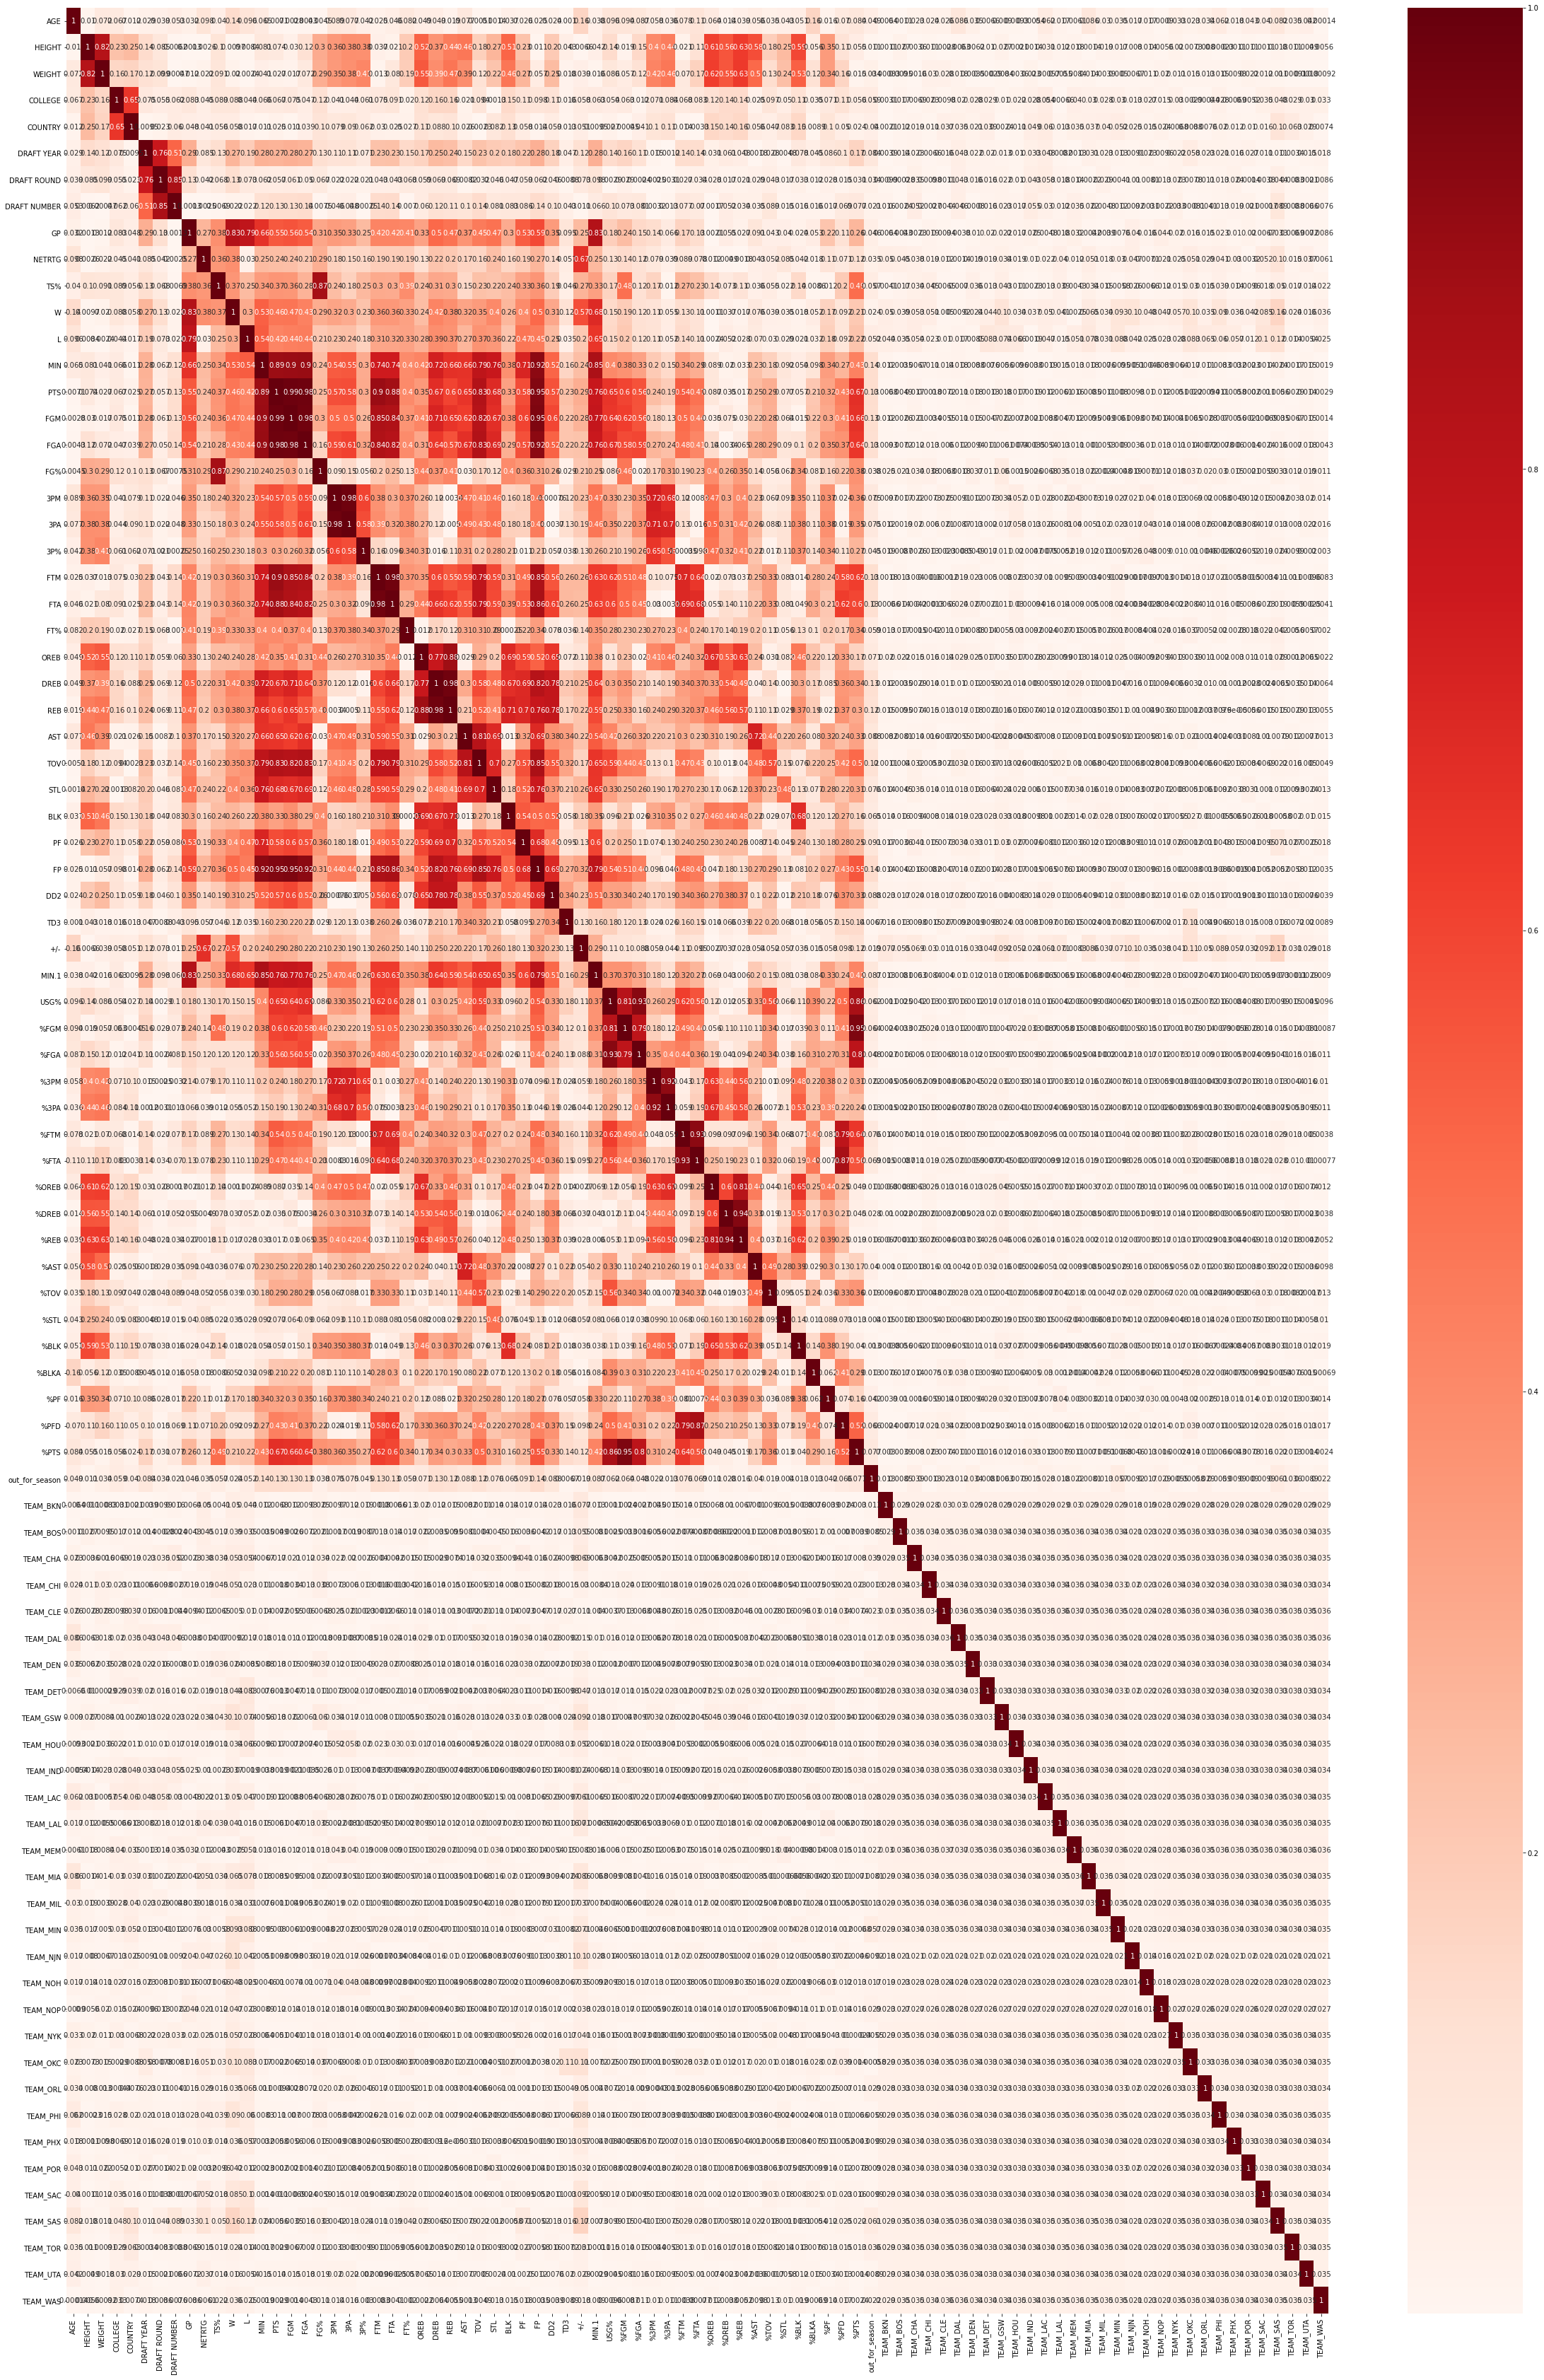

In [39]:
# Heatmap to display correlations in data
corr = X.corr().abs()
fig, ax=plt.subplots(figsize=(40,60))
sns.heatmap(corr, cmap='Reds', annot=True);

In [40]:
injury_df = df[(df['Notes'].str.contains('tear|torn|rupture', case=False))]
injury_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 642 entries, 1 to 27102
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            642 non-null    object
 1   Team            642 non-null    object
 2   Name            642 non-null    object
 3   Notes           642 non-null    object
 4   ACL             642 non-null    int64 
 5   Achilles        642 non-null    int64 
 6   out_for_season  642 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 40.1+ KB


In [41]:
injury_df.drop_duplicates(subset=['Name'], inplace=True)
injury_df

<ipython-input-41-663e408ae66e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injury_df.drop_duplicates(subset=['Name'], inplace=True)


,Date,Team,Name,Notes,ACL,Achilles,out_for_season
1,2010-10-06,Pistons,Jonas Jerebko,torn right Achilles tendon (out indefinitely),0,1,0
3,2010-10-08,Blazers,Jeff Ayres,torn ACL in right knee (out indefinitely),1,0,0
7,2010-10-09,Nuggets,Al Harrington,partially torn plantar fascia in left foot (out indefinitely),0,0,0
18,2010-10-26,Blazers,Joel Przybilla,placed on IL placed on IL recovering from surgery on right knee to repair ruptured patella tendon,0,0,0
20,2010-10-26,Celtics,Kendrick Perkins,placed on IL recovering from surgery on right knee to repair torn ACL,1,0,0
...,...,...,...,...,...,...,...
26496,2020-02-24,Pacers,Jeremy Lamb,torn ACL in left knee (out for season),1,0,1
26832,2020-08-02,Magic,Jonathan Isaac,torn ACL in left knee (out for season),1,0,1
26846,2020-08-04,Grizzlies,Jaren Jackson Jr.,torn meniscus in left knee (out indefinitely),0,0,0
27070,2020-08-25,Celtics,Javonte Green,arthroscopic surgery on right knee to repair torn meniscus (out for season),0,0,1


In [42]:
inj_10 = injury_df[(injury_df['Date'] < '2012-07-01')]
inj_11 = injury_df[(injury_df['Date'].between('2012-07-01','2013-07-01'))]

In [43]:
inj_10

,Date,Team,Name,Notes,ACL,Achilles,out_for_season
1,2010-10-06,Pistons,Jonas Jerebko,torn right Achilles tendon (out indefinitely),0,1,0
3,2010-10-08,Blazers,Jeff Ayres,torn ACL in right knee (out indefinitely),1,0,0
7,2010-10-09,Nuggets,Al Harrington,partially torn plantar fascia in left foot (out indefinitely),0,0,0
18,2010-10-26,Blazers,Joel Przybilla,placed on IL placed on IL recovering from surgery on right knee to repair ruptured patella tendon,0,0,0
20,2010-10-26,Celtics,Kendrick Perkins,placed on IL recovering from surgery on right knee to repair torn ACL,1,0,0
26,2010-10-26,Lakers,Andrew Bynum,placed on IL recovering from surgery on right knee to repair torn ligaments,0,0,0
41,2010-10-27,Bucks,Michael Redd,placed on IL recovering from surgery on left knee to repair torn ACL,1,0,0
57,2010-10-27,Jazz,Mehmet Okur,placed on IL recovering from surgery to repair torn left Achilles tendon,0,1,0
69,2010-10-27,Nuggets,Chris Andersen,placed on IL recovering from surgery on right knee to repair partially torn patella tendon,0,0,0
77,2010-10-27,Raptors,Ed Davis,placed on IL recovering from arthroscopic surgery on right kene to repair torn meniscus,0,0,0


In [44]:
ofs = injury_df[(injury_df['out_for_season'] ==1)]
ach = injury_df[(injury_df['Achilles'] ==1)]
acl = injury_df[(injury_df['ACL'] ==1)]

Multiple entries for same player and injury are noted. The duplicates need to be removed.

In [45]:
acl.Name.value_counts()

Jeremy Lamb           1
Kendall Marshall      1
Jonathan Isaac        1
Kristaps Porzingis    1
Iman Shumpert         1
Derrick Rose          1
Ricky Rubio           1
David West            1
Jabari Parker         1
Michael Redd          1
Kendrick Perkins      1
J.J. Hickson          1
Leandro Barbosa       1
Nate Robinson         1
Zach LaVine           1
Jeff Ayres            1
Baron Davis           1
Lou Williams          1
Tony Wroten Jr.       1
Brandon Rush          1
Gani Lawal            1
Dante Exum            1
Brandon Knight        1
Klay Thompson         1
Dejounte Murray       1
Danilo Gallinari      1
Josh Howard           1
Eric Maynor           1
Rajon Rondo           1
Max Strus             1
Jarrett Jack          1
O.G. Anunoby          1
Name: Name, dtype: int64

In [46]:
len(acl.Name.value_counts())

32

In [47]:
# Drop duplicate entries for same player ACL rupture
acl.drop_duplicates(subset=['Name'], inplace=True)

<ipython-input-47-8131dee1c6b5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acl.drop_duplicates(subset=['Name'], inplace=True)


In [48]:
acl.Name.value_counts()

Jeremy Lamb           1
Kendall Marshall      1
Jonathan Isaac        1
Kristaps Porzingis    1
Iman Shumpert         1
Derrick Rose          1
Ricky Rubio           1
David West            1
Jabari Parker         1
Michael Redd          1
Kendrick Perkins      1
J.J. Hickson          1
Leandro Barbosa       1
Nate Robinson         1
Zach LaVine           1
Jeff Ayres            1
Baron Davis           1
Lou Williams          1
Tony Wroten Jr.       1
Brandon Rush          1
Gani Lawal            1
Dante Exum            1
Brandon Knight        1
Klay Thompson         1
Dejounte Murray       1
Danilo Gallinari      1
Josh Howard           1
Eric Maynor           1
Rajon Rondo           1
Max Strus             1
Jarrett Jack          1
O.G. Anunoby          1
Name: Name, dtype: int64

In [49]:
len(acl.Name.value_counts())

32

In [50]:
acl

,Date,Team,Name,Notes,ACL,Achilles,out_for_season
3,2010-10-08,Blazers,Jeff Ayres,torn ACL in right knee (out indefinitely),1,0,0
20,2010-10-26,Celtics,Kendrick Perkins,placed on IL recovering from surgery on right knee to repair torn ACL,1,0,0
41,2010-10-27,Bucks,Michael Redd,placed on IL recovering from surgery on left knee to repair torn ACL,1,0,0
99,2010-10-28,Wizards,Josh Howard,placed on IL with torn ACL in left knee,1,0,0
1053,2011-01-06,Suns,Gani Lawal,torn ACL and partially torn MCL in right knee (out for season),1,0,1
2120,2011-03-25,Hornets,David West,placed on IL with torn ACL in left knee (out for season),1,0,1
2877,2012-01-08,Thunder,Eric Maynor,placed on IL with torn ACL in right knee (out for season),1,0,1
3903,2012-03-09,Timberwolves,Ricky Rubio,torn ACL in left knee (out for season),1,0,1
4946,2012-04-28,Bulls,Derrick Rose,torn ACL in left knee (out for season),1,0,1
4951,2012-04-28,Knicks,Iman Shumpert,torn lateral meniscus / ACL (CBC) in left knee (out for season),1,0,1


In [51]:
acl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 3 to 26832
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            32 non-null     object
 1   Team            32 non-null     object
 2   Name            32 non-null     object
 3   Notes           32 non-null     object
 4   ACL             32 non-null     int64 
 5   Achilles        32 non-null     int64 
 6   out_for_season  32 non-null     int64 
dtypes: int64(3), object(4)
memory usage: 2.0+ KB


In [52]:
acl_10 = acl[(acl['Date'] < '2012-01-08')]

In [53]:
acl_10

,Date,Team,Name,Notes,ACL,Achilles,out_for_season
3,2010-10-08,Blazers,Jeff Ayres,torn ACL in right knee (out indefinitely),1,0,0
20,2010-10-26,Celtics,Kendrick Perkins,placed on IL recovering from surgery on right knee to repair torn ACL,1,0,0
41,2010-10-27,Bucks,Michael Redd,placed on IL recovering from surgery on left knee to repair torn ACL,1,0,0
99,2010-10-28,Wizards,Josh Howard,placed on IL with torn ACL in left knee,1,0,0
1053,2011-01-06,Suns,Gani Lawal,torn ACL and partially torn MCL in right knee (out for season),1,0,1
2120,2011-03-25,Hornets,David West,placed on IL with torn ACL in left knee (out for season),1,0,1


In [54]:
ach.Name.value_counts()

Mehmet Okur         1
Brandon Jennings    1
Kevin Durant        1
David Nwaba         1
Darius Miller       1
DeSagana Diop       1
Mario Chalmers      1
DeMarcus Cousins    1
Dwight Powell       1
Jeff Taylor         1
Jonas Jerebko       1
Darrell Arthur      1
Rodney Hood         1
Elliot Williams     1
C.J. Wilcox         1
Kobe Bryant         1
Wes Matthews Jr.    1
John Wall           1
Sheldon Mac         1
Rudy Gay            1
Name: Name, dtype: int64

In [55]:
# Drop duplicate entries for same player Achilles rupture
ach.drop_duplicates(subset=['Name'], inplace=True)

<ipython-input-55-baf7587a5d3b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ach.drop_duplicates(subset=['Name'], inplace=True)


In [56]:
len(ach.Name.value_counts())

20

In [57]:
ach

,Date,Team,Name,Notes,ACL,Achilles,out_for_season
1,2010-10-06,Pistons,Jonas Jerebko,torn right Achilles tendon (out indefinitely),0,1,0
57,2010-10-27,Jazz,Mehmet Okur,placed on IL recovering from surgery to repair torn left Achilles tendon,0,1,0
1003,2011-01-03,Bobcats,DeSagana Diop,placed on IL with ruptured right Achilles tendon (out for season),0,1,1
2630,2011-12-20,Grizzlies,Darrell Arthur,ruptured right Achilles tendon (out for season),0,1,1
5026,2012-09-11,Blazers,Elliot Williams,torn left Achilles tendon (out indefinitely),0,1,0
7213,2013-04-12,Lakers,Kobe Bryant,torn left Achilles tendon (out indefinitely),0,1,0
8384,2013-12-21,Bobcats,Jeff Taylor,torn right Achilles tendon (DNP),0,1,0
11690,2015-01-24,Pistons,Brandon Jennings,torn left Achilles (out for season),0,1,1
12185,2015-03-06,Blazers,Wes Matthews Jr.,torn left Achilles tendon (out for season),0,1,1
15018,2016-03-09,Grizzlies,Mario Chalmers,ruptured right Achilles tendon (out for season),0,1,1


In [58]:
ofs.Name.value_counts()

Mario Chalmers      1
Wilson Chandler     1
Isaiah Canaan       1
Rudy Gay            1
Brandon Knight      1
                   ..
Kendall Marshall    1
Sergey Karasev      1
Iman Shumpert       1
Jonathan Isaac      1
Anthony Davis       1
Name: Name, Length: 68, dtype: int64

In [59]:
len(ofs.Name.value_counts())

68

In [60]:
# Drop duplicate entries for same player Achilles rupture
ofs.drop_duplicates(subset=['Name'], inplace=True)
ofs.Name.value_counts()

<ipython-input-60-da7a3779b5b5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofs.drop_duplicates(subset=['Name'], inplace=True)


Mario Chalmers      1
Wilson Chandler     1
Isaiah Canaan       1
Rudy Gay            1
Brandon Knight      1
                   ..
Kendall Marshall    1
Sergey Karasev      1
Iman Shumpert       1
Jonathan Isaac      1
Anthony Davis       1
Name: Name, Length: 68, dtype: int64

In [61]:
len(ofs.Name.value_counts())

68

In [62]:
ofs

,Date,Team,Name,Notes,ACL,Achilles,out_for_season
402,2010-11-22,Heat,Udonis Haslem,placed on IL with torn ligament in left foot (out for season),0,0,1
995,2011-01-02,Mavericks,Caron Butler,placed on IL with torn patella tendon in right knee (out for season),0,0,1
1003,2011-01-03,Bobcats,DeSagana Diop,placed on IL with ruptured right Achilles tendon (out for season),0,1,1
1053,2011-01-06,Suns,Gani Lawal,torn ACL and partially torn MCL in right knee (out for season),1,0,1
1058,2011-01-07,Cavaliers,Anderson Varejao,torn tendon in right ankle (out for season),0,0,1
...,...,...,...,...,...,...,...
26080,2020-01-22,Mavericks,Dwight Powell,torn right Achilles tendon (out for season),0,1,1
26494,2020-02-24,Mavericks,Jalen Brunson,placed on IL with torn labrum in right shoulder (out for season),0,0,1
26496,2020-02-24,Pacers,Jeremy Lamb,torn ACL in left knee (out for season),1,0,1
26832,2020-08-02,Magic,Jonathan Isaac,torn ACL in left knee (out for season),1,0,1
